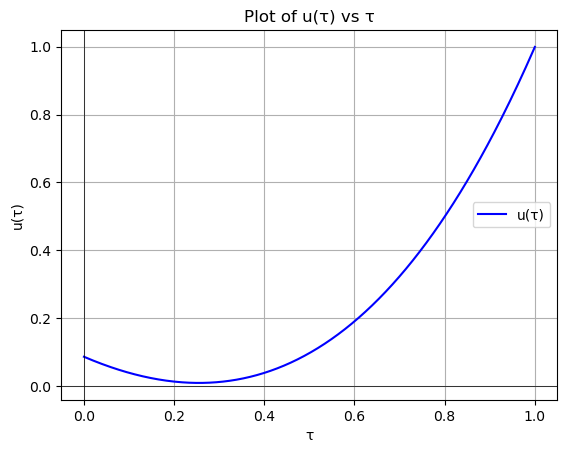

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function u(tau)
def u(tau):
    e = -3.8
    c = 0.0863
    n = 1.2
    return c + (1 - c) * (tau**2) -((2-2*c+2*e*c-(n**2)*c-2*e*(c**2))/n)*(-2*np.sinh(n*tau))-4*tau/(n**2)
# Generate tau values
tau_values = np.linspace(0, 1, 400)
u_values = u(tau_values)  

# Plotting
plt.plot(tau_values, u_values, label='u(τ)', color='blue')
plt.xlabel('τ')
plt.ylabel('u(τ)')
plt.title('Plot of u(τ) vs τ')
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


Optimal n ≈ 1.48754
Corresponding c ≈ 0.26020
Minimum MSE ≈ 7.501168e-02


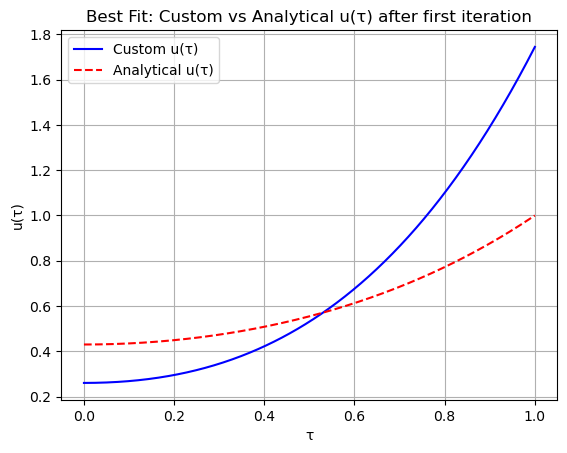

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define error function to minimize (MSE between custom and analytical)
def mse(n):
    if n <= 0:  # Avoid division by zero
        return np.inf

    # Compute c from u'(0) = 0
    c = 2 * (n**2 - 1) / (2 * n**2 + n**4)

    # Tau values
    tau = np.linspace(0, 1, 400)

    # Custom u(τ)
    u_custom = c + (1 - c) * tau**2 \
        - ((2 - 2 * c - n**2 * c) / n) * (-2 * np.sinh(n * tau)) \
        - 4 * tau / n**2

    # Analytical u(τ)
    u_analytical = (1 / np.cosh(n)) * np.cosh(n * tau)

    # Mean squared error
    return np.mean((u_custom - u_analytical) ** 2)

# Optimize n
res = minimize_scalar(mse, bounds=(0.5, 2.0), method='bounded')
n_opt = res.x
c_opt = 2 * (n_opt**2 - 1) / (2 * n_opt**2 + n_opt**4)

# Report best match
print(f"Optimal n ≈ {n_opt:.5f}")
print(f"Corresponding c ≈ {c_opt:.5f}")
print(f"Minimum MSE ≈ {res.fun:.6e}")

# Plot both curves
tau = np.linspace(0, 1, 400)
u_custom = c_opt + (1 - c_opt) * tau**2 \
    - ((2 - 2 * c_opt - n_opt**2 * c_opt) / n_opt) * (-2 * np.sinh(n_opt * tau)) \
    - 4 * tau / n_opt**2

u_analytical = (1 / np.cosh(n_opt)) * np.cosh(n_opt * tau)

plt.plot(tau, u_custom, label='Custom u(τ)', color='blue')
plt.plot(tau, u_analytical, label='Analytical u(τ)', color='red', linestyle='--')
plt.xlabel('τ')
plt.ylabel('u(τ)')
plt.title('Best Fit: Custom vs Analytical u(τ) after first iteration')
plt.grid(True)
plt.legend()
plt.show()
